In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_dataset = pd.read_csv('C:\\Users\\Pallavi\\Desktop\\MAJOR_PROJECT\\wine data.csv')

In [3]:
#number of rows and columns in dataset
wine_dataset.shape

(1599, 12)

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [5]:
wine_dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide     True
density                 False
pH                       True
sulphates               False
alcohol                 False
quality                  True
dtype: bool

In [6]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [7]:
wine_dataset[wine_dataset['total sulfur dioxide'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.8,10.5,5.0


In [8]:
wine_dataset[wine_dataset['pH'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.997,NaN,0.58,9.3,6.0


In [9]:
wine_dataset[wine_dataset['quality'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,NaN


In [10]:
wine_dataset.drop([9,123,184],axis=0,inplace=True)

In [11]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
#statistical measures
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


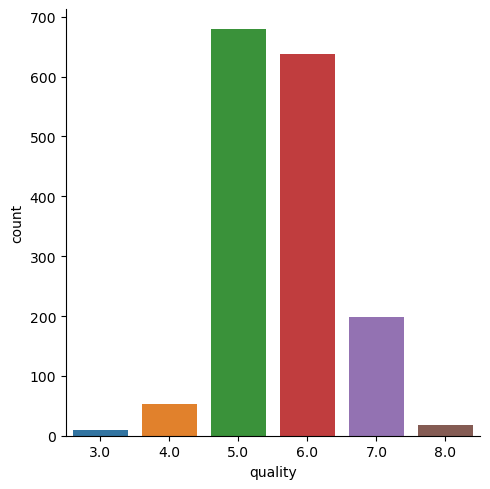

In [13]:
sns.catplot(data = wine_dataset, x = 'quality', kind = 'count')

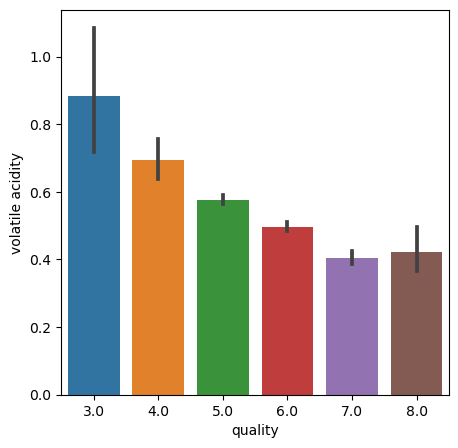

In [14]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_dataset,x = 'quality',y = 'volatile acidity')
plt.show()

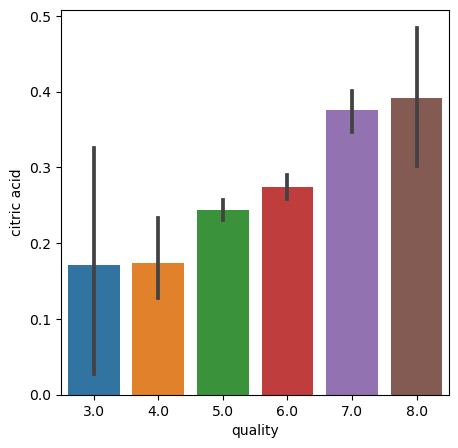

In [15]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_dataset,x = 'quality',y = 'citric acid')
plt.show()

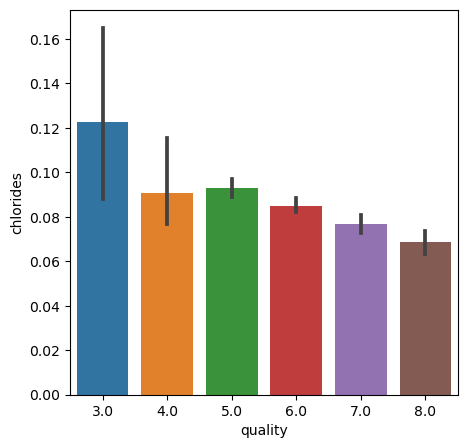

In [16]:
#chlorides vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_dataset,x = 'quality',y = 'chlorides')
plt.show()

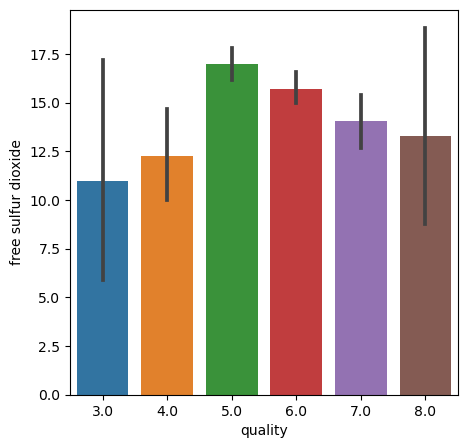

In [17]:
#free sulfur dioxide vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_dataset,x = 'quality',y = 'free sulfur dioxide')
plt.show()

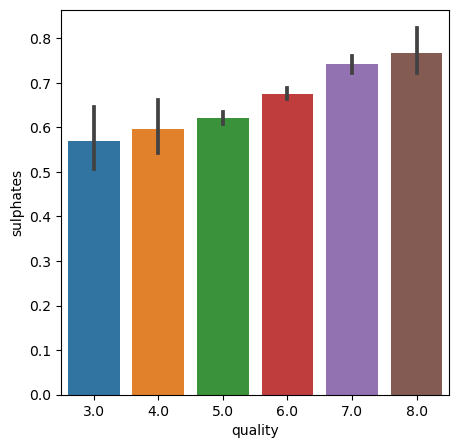

In [18]:
#sulphates vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_dataset,x = 'quality',y = 'sulphates')
plt.show()

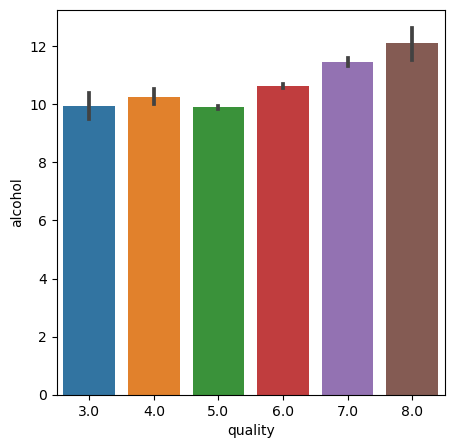

In [19]:
#alcohol vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_dataset,x = 'quality',y = 'alcohol')
plt.show()

# Correlation

In [24]:
correlation = wine_dataset.corr()
plt.figure(figsize=(5,5))
plt.show()

<Figure size 500x500 with 0 Axes>

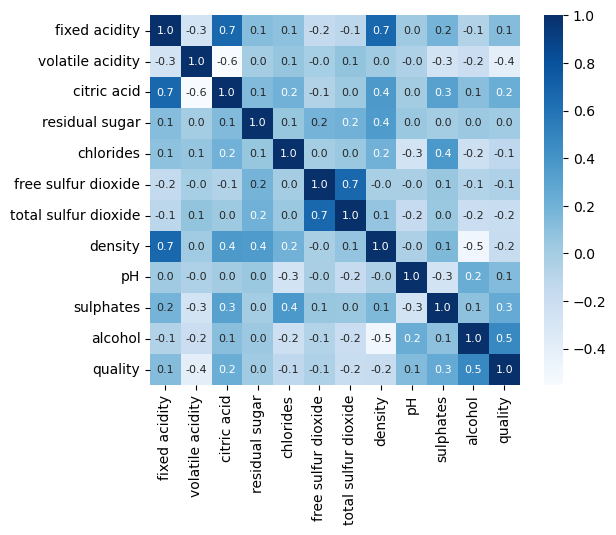

In [23]:
#construction of heatmap to understand correlation
sns.heatmap(correlation,cbar = True,square = True,fmt = '.1f',annot = True, annot_kws={'size':8},cmap = 'Blues')
plt.show()

# Data Pre- Processing

In [25]:
#seperating data and labels
X = wine_dataset.drop('quality',axis=1)

In [26]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0) #label binarization

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

# Model Training Random Forest Classifier

In [28]:
model = RandomForestClassifier()

In [29]:
model.fit(X_train,Y_train)

RandomForestClassifier()

# Model Evaluation Accuracy Score

In [30]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [31]:
print("Accuracy score:", test_data_accuracy)

Accuracy score: 0.90625


# Buiding A Predictive System

In [32]:
input_data = (7,0.56,0.17,1.7,0.065,15,24,0.99514,3.52,0.68,10.55)
#changing to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshaping the data
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
if prediction[0]==1:
    print('Good quality wine')
else:
    print('Bad quality wine')

Good quality wine


C:\Users\Pallavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
